In [1]:
# Import required libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import numpy as np
from scipy.stats import linregress

import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns

# Tool to searilize both the fitted StandardScaler and the best estimator from the grid search
import joblib

from sklearn.preprocessing import StandardScaler


In [3]:
### import and read csv file

path = '../Output/full_indicators_by_country_by_year.csv'
full_indicators_df = pd.read_csv(path)
# full_indicators = full_indicators.rename(columns={'total':'Immigration_flow'})

full_indicators_df.head(5)

,index,country,iso3Code,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)",...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
0,0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,...,0.009,0.292137,3.299608,0.00,0.000,0.000,9.052,20.0,3.294,7.758981
1,1,Afghanistan,AFG,2016,28.8,97.7,58.123668,3.635915,327.0,37.936,...,0.013,0.324903,4.333403,0.00,0.000,0.000,10.133,20.0,3.294,7.651162
2,2,Afghanistan,AFG,2017,30.3,97.7,58.123668,3.501771,327.0,37.342,...,0.017,0.333475,4.353572,15.46,12.283,16.155,11.184,20.0,3.294,9.694882
3,3,Afghanistan,AFG,2018,31.4,93.4,58.276988,2.961201,327.0,36.927,...,0.016,0.344999,3.323800,15.46,12.283,16.155,11.196,20.0,3.294,9.688910
4,4,Afghanistan,AFG,2019,32.6,97.7,58.276988,3.023536,327.0,36.466,...,0.016,0.291267,2.974238,15.46,12.283,16.155,11.185,20.0,3.294,10.275749


In [3]:
# Generate summary statistics
#full_indicators_df.describe()

---

### Prepare the Data

In [4]:
full_indicators_df.columns

Index(['index', 'country', 'iso3Code', 'year',
       'clean fuels for cooking (% of population)',
       'Access to electricity (% of population)', 'Agricultural land (% )',
       'Armed forces (% labor force)', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central government debt, total (% of GDP)',
       'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
       'Cost of business start-up (% of GNI per capita)',
       'Current account balance (% of GDP)',
       'Current health expenditure (% of GDP)',
       'Death rate, crude (per 1,000 people)',
       'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
       'doing business score', 'Fertility rate, total (births per woman)',
       '% Firms using banks', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita, PPP (constant 2021 international $)',
       'GNI per capita (2015 US$)', 'government 

## This section will used Unsupervised learning to group related countries in same cluster

### Normalize the data using StandardScaler()

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

scaler = StandardScaler()
indicators_scaled = scaler.fit_transform(full_indicators_df[[

                                                                      'clean fuels for cooking (% of population)',
                                                                      'Access to electricity (% of population)', 'Agricultural land (% )',
                                                                      'Armed forces (% labor force)', 'precipitation (mm per year)',
                                                                      'Birth rate, crude (per 1,000 people)',
                                                                      'Central government debt, total (% of GDP)',
                                                                      'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
                                                                      'Cost of business start-up (% of GNI per capita)',
                                                                      'Current account balance (% of GDP)',
                                                                      'Current health expenditure (% of GDP)',
                                                                      'Death rate, crude (per 1,000 people)',
                                                                      'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
                                                                      'doing business score', 'Fertility rate, total (births per woman)',
                                                                      '% Firms using banks', 'GDP growth (annual %)',
                                                                      'GDP per capita (constant 2015 US$)',
                                                                      'GDP per capita, PPP (constant 2021 international $)',
                                                                      'GNI per capita (2015 US$)', 'government  consumption exp (% of GDP)',
                                                                      'Government expenditure on education, total (% of GDP)',
                                                                      'Human Capital Index',
                                                                      'Industry (including construction), value added (% of GDP)',
                                                                      'Inflation, consumer prices (annual %)', 'Level of water stress',
                                                                      'Life expectancy at birth, total (years)',
                                                                      'Military expenditure (% of GDP)', 'Population density',
                                                                      'Population growth (annual %)', '% of total population below 5 meters',
                                                                      'Population living in slums (% of urban population)',
                                                                      'Population, total', 'Poverty $2.15 a day (% of population)',
                                                                      'Poverty $3.65 a day (% of population)',
                                                                      'Poverty $6.85 a day (% of population)', '%  Poverty headcount ratio ',
                                                                      'Time to start a business (days)',
                                                                      'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
                                                                      'Total debt service (% of GNI)',
                                                                      'Total debt service (% of exports of goods, services and primary income)',
                                                                      'Unemployment advanced education', 'Unemployment basic education ',
                                                                      'Unemployment intermediate education',
                                                                      'Unemployment, total (% of total labor force) (modeled ILO estimate)',
                                                                      'Corruption index 2023', 'Global_Peace_Index_2023', 'immigration_100k'
    

                                                                      
                                                                      ]])

In [7]:
# Create a DataFrame with the scaled data
indicators_scaled_df = pd.DataFrame(indicators_scaled, columns=[
                                                               
                                                               'clean fuels for cooking (% of population)',
                                                               'Access to electricity (% of population)', 'Agricultural land (% )',
                                                               'Armed forces (% labor force)', 'precipitation (mm per year)',
                                                               'Birth rate, crude (per 1,000 people)',
                                                               'Central government debt, total (% of GDP)',
                                                               'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
                                                               'Cost of business start-up (% of GNI per capita)',
                                                               'Current account balance (% of GDP)',
                                                               'Current health expenditure (% of GDP)',
                                                               'Death rate, crude (per 1,000 people)',
                                                               'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
                                                               'doing business score', 'Fertility rate, total (births per woman)',
                                                               '% Firms using banks', 'GDP growth (annual %)',
                                                               'GDP per capita (constant 2015 US$)',
                                                               'GDP per capita, PPP (constant 2021 international $)',
                                                               'GNI per capita (2015 US$)', 'government  consumption exp (% of GDP)',
                                                               'Government expenditure on education, total (% of GDP)',
                                                               'Human Capital Index',
                                                               'Industry (including construction), value added (% of GDP)',
                                                               'Inflation, consumer prices (annual %)', 'Level of water stress',
                                                               'Life expectancy at birth, total (years)',
                                                               'Military expenditure (% of GDP)', 'Population density',
                                                               'Population growth (annual %)', '% of total population below 5 meters',
                                                               'Population living in slums (% of urban population)',
                                                               'Population, total', 'Poverty $2.15 a day (% of population)',
                                                               'Poverty $3.65 a day (% of population)',
                                                               'Poverty $6.85 a day (% of population)', '%  Poverty headcount ratio ',
                                                               'Time to start a business (days)',
                                                               'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
                                                               'Total debt service (% of GNI)',
                                                               'Total debt service (% of exports of goods, services and primary income)',
                                                               'Unemployment advanced education', 'Unemployment basic education ',
                                                               'Unemployment intermediate education',
                                                               'Unemployment, total (% of total labor force) (modeled ILO estimate)',
                                                               'Corruption index 2023', 'Global_Peace_Index_2023', 'immigration_100k'
                                                        
                                                               ])

# # create a new column country-year from country and year

indicators_scaled_df['country-year'] = full_indicators_df['country'].astype(str) + ' - ' + full_indicators_df['year'].astype(str)



# Display the scaled DataFrame
indicators_scaled_df.head()

,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),Control of Corruption: Estimate,Cost of business start-up (% of GNI per capita),...,Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k,country-year
0,-0.952155,-0.449773,0.887050,1.668181,-0.937583,1.911776,-0.599072,-0.098180,-1.247837,-0.071469,...,-0.538305,-0.477919,-0.952657,-0.898684,-1.019808,0.340125,-0.958168,1.626599,-0.099321,Afghanistan - 2015
1,-0.921814,0.517416,0.887050,1.610880,-0.937583,1.826180,-0.599072,-0.095043,-1.430819,-0.048522,...,-0.532740,-0.404039,-0.952657,-0.898684,-1.019808,0.527347,-0.958168,1.626599,-0.102459,Afghanistan - 2016
2,-0.883888,0.517416,0.887050,1.524272,-0.937583,1.767536,-0.599072,-0.091327,-1.420804,1.542467,...,-0.531284,-0.402597,1.688640,0.696312,1.421518,0.709374,-0.958168,1.626599,-0.042975,Afghanistan - 2017
3,-0.856076,0.358678,0.893859,1.175262,-0.937583,1.726564,-0.599072,-0.090836,-1.393977,-0.392726,...,-0.529327,-0.476190,1.688640,0.696312,1.421518,0.711452,-0.958168,1.626599,-0.043149,Afghanistan - 2018
4,-0.825735,0.517416,0.893859,1.215508,-0.937583,1.681050,-0.599072,-0.089020,-1.311552,-0.382527,...,-0.538452,-0.501171,1.688640,0.696312,1.421518,0.709547,-0.958168,1.626599,-0.026069,Afghanistan - 2019


In [8]:
## Rename the indicators to be more ... friendly

indicators_scaled_df = indicators_scaled_df.rename(columns={


                                            'Access to clean fuels and technologies for cooking (% of population)'    :   'clean fuels for cooking (% of population)'  ,
                                            'Access to electricity (% of population)'    :   'Access to electricity (% of population)'  ,
                                            'Agricultural land (% of land area)'    :   'Agricultural land (% )'  ,
                                            'Armed forces personnel (% of total labor force)'    :   'Armed forces (% labor force)'  ,
                                            'Average precipitation in depth (mm per year)'    :   'precipitation (mm per year)'  ,
                                            'Birth rate crude (per 1000 people)'    :   'Birth rate crude'  ,
                                            'Central government debt total (% of GDP)'    :   'government debt (% of GDP)'  ,
                                            'Consumer price index (2010 = 100) Control of Corruption: Estimate'    :   'Consumer price index (2010)'  ,
                                            'Cost of business start-up procedures (% of GNI per capita)'    :   'Cost of business start-up (% of GNI per capita)'  ,
                                            'Current account balance (% of GDP)'    :   'Current account balance (% of GDP)'  ,
                                            'Current health expenditure (% of GDP)'    :   'Current health expenditure (% of GDP)'  ,
                                            'Death rate crude (per 1000 people)'    :   'Death rate crude (per 1000 people)'  ,
                                            'Debt service (PPG and IMF only % of exports of goods services and primary income)'    :   'Debt service'  ,
                                            'Ease of doing business score (0 = lowest performance to 100 = best performance)'    :   'doing business score'  ,
                                            'Fertility rate total (births per woman)'    :   'Fertility rate per woman'  ,
                                            'Firms using banks to finance investment (% of firms)'    :   '% Firms using banks'  ,
                                            'GDP growth (annual %) GDP per capita (constant 2015 US$)'    :   'GDP per capita growth '  ,
                                            'GDP per capita PPP (constant 2021 international $)'    :   'GDP per capita PPP ( 2021)'  ,
                                            'GNI per capita (constant 2015 US$)'    :   'GNI per capita (2015 US$)'  ,
                                            'General government final consumption expenditure (% of GDP)'    :   'government  consumption exp (% of GDP)'  ,
                                            'Government expenditure on education total (% of GDP)'    :   'Government expenditure on education total (% of GDP)'  ,
                                            'Human Capital Index (HCI) (scale 0-1)'    :   'Human Capital Index'  ,
                                            'Industry (including construction) value added (% of GDP)'    :   'Industry (% of GDP)'  ,
                                            'Inflation consumer prices (annual %)'    :   'Inflation consumer prices (%)'  ,
                                            'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources'    :   'Level of water stress'  ,
                                            'Life expectancy at birth total (years)'    :   'Life expectancy at birth total (years)'  ,
                                            'Military expenditure (% of GDP)'    :   'Military expenditure (% of GDP)'  ,
                                            'Population density (people per sq. km of land area)'    :   'Population density'  ,
                                            'Population growth (annual %)'    :   'Population growth (annual %)'  ,
                                            'Population living in areas where elevation is below 5 meters (% of total population)'    :   '% of total population below 5 meters'  ,
                                            'Population living in slums (% of urban population)'    :   'Population living in slums (% of urban population)'  ,
                                            'Population total'    :   'Population total'  ,
                                            'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'    :   'Poverty $2.15 a day (% of population)'  ,
                                            'Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population)'    :   'Poverty $3.65 a day (% of population)'  ,
                                            'Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population)'    :   'Poverty $6.85 a day (% of population)'  ,
                                            'Poverty headcount ratio at national poverty lines (% of population)'    :   '%  Poverty headcount ratio '  ,
                                            'Time required to start a business (days)'    :   'Time to start a business (days)'  ,
                                            'Total alcohol consumption per capita (liters of pure alcohol projected estimates 15+ years of age)'    :   'Alcohol consumption per capita'  ,
                                            'Total debt service (% of GNI)'    :   'Total debt service (% of GNI)'  ,
                                            'Total debt service (% of exports of goods services and primary income)'    :   'Total debt service (% of exports)'  ,
                                            'Unemployment with advanced education (% of total labor force with advanced education)'    :   'Unemployment advanced education'  ,
                                            'Unemployment with basic education (% of total labor force with basic education)'    :   'Unemployment basic education '  ,
                                            'Unemployment with intermediate education (% of total labor force with intermediate education)'    :   'Unemployment intermediate education'  ,
                                            'Unemployment total (% of total labor force) (modeled ILO estimate)]'    :   'Unemployment total'  ,
                                            'CPI_score_2023' : 'Corruption index 2023'


                                                    })
indicators_scaled_df.head(5)

,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),Control of Corruption: Estimate,Cost of business start-up (% of GNI per capita),...,Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k,country-year
0,-0.952155,-0.449773,0.887050,1.668181,-0.937583,1.911776,-0.599072,-0.098180,-1.247837,-0.071469,...,-0.538305,-0.477919,-0.952657,-0.898684,-1.019808,0.340125,-0.958168,1.626599,-0.099321,Afghanistan - 2015
1,-0.921814,0.517416,0.887050,1.610880,-0.937583,1.826180,-0.599072,-0.095043,-1.430819,-0.048522,...,-0.532740,-0.404039,-0.952657,-0.898684,-1.019808,0.527347,-0.958168,1.626599,-0.102459,Afghanistan - 2016
2,-0.883888,0.517416,0.887050,1.524272,-0.937583,1.767536,-0.599072,-0.091327,-1.420804,1.542467,...,-0.531284,-0.402597,1.688640,0.696312,1.421518,0.709374,-0.958168,1.626599,-0.042975,Afghanistan - 2017
3,-0.856076,0.358678,0.893859,1.175262,-0.937583,1.726564,-0.599072,-0.090836,-1.393977,-0.392726,...,-0.529327,-0.476190,1.688640,0.696312,1.421518,0.711452,-0.958168,1.626599,-0.043149,Afghanistan - 2018
4,-0.825735,0.517416,0.893859,1.215508,-0.937583,1.681050,-0.599072,-0.089020,-1.311552,-0.382527,...,-0.538452,-0.501171,1.688640,0.696312,1.421518,0.709547,-0.958168,1.626599,-0.026069,Afghanistan - 2019


In [9]:
# list the columns in the data frame
indicators_scaled_df.columns

Index(['clean fuels for cooking (% of population)',
       'Access to electricity (% of population)', 'Agricultural land (% )',
       'Armed forces (% labor force)', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central government debt, total (% of GDP)',
       'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
       'Cost of business start-up (% of GNI per capita)',
       'Current account balance (% of GDP)',
       'Current health expenditure (% of GDP)',
       'Death rate, crude (per 1,000 people)',
       'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
       'doing business score', 'Fertility rate, total (births per woman)',
       '% Firms using banks', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita, PPP (constant 2021 international $)',
       'GNI per capita (2015 US$)', 'government  consumption exp (% of GDP)',
       'Governmen

In [10]:
# Reorganize columns

indicators_scaled_df = indicators_scaled_df[[

                                                'country-year', 
                                                'clean fuels for cooking (% of population)',
                                                'Access to electricity (% of population)', 'Agricultural land (% )',
                                            'Armed forces (% labor force)', 'precipitation (mm per year)',
                                            'Birth rate, crude (per 1,000 people)',
                                            'Central government debt, total (% of GDP)',
                                            'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
                                            'Cost of business start-up (% of GNI per capita)',
                                            'Current account balance (% of GDP)',
                                            'Current health expenditure (% of GDP)',
                                            'Death rate, crude (per 1,000 people)',
                                            'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
                                            'doing business score', 'Fertility rate, total (births per woman)',
                                            '% Firms using banks', 'GDP growth (annual %)',
                                            'GDP per capita (constant 2015 US$)',
                                            'GDP per capita, PPP (constant 2021 international $)',
                                            'GNI per capita (2015 US$)', 'government  consumption exp (% of GDP)',
                                            'Government expenditure on education, total (% of GDP)',
                                            'Human Capital Index',
                                            'Industry (including construction), value added (% of GDP)',
                                            'Inflation, consumer prices (annual %)', 'Level of water stress',
                                            'Life expectancy at birth, total (years)',
                                            'Military expenditure (% of GDP)', 'Population density',
                                            'Population growth (annual %)', '% of total population below 5 meters',
                                            'Population living in slums (% of urban population)',
                                            'Population, total', 'Poverty $2.15 a day (% of population)',
                                            'Poverty $3.65 a day (% of population)',
                                            'Poverty $6.85 a day (% of population)', '%  Poverty headcount ratio ',
                                            'Time to start a business (days)',
                                            'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
                                            'Total debt service (% of GNI)',
                                            'Total debt service (% of exports of goods, services and primary income)',
                                            'Unemployment advanced education', 'Unemployment basic education ',
                                            'Unemployment intermediate education',
                                            'Unemployment, total (% of total labor force) (modeled ILO estimate)',
                                            'Corruption index 2023', 'Global_Peace_Index_2023', 'immigration_100k'
                                                                
                                            ]]
indicators_scaled_df.head(5)

,country-year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),Control of Corruption: Estimate,...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
0,Afghanistan - 2015,-0.952155,-0.449773,0.887050,1.668181,-0.937583,1.911776,-0.599072,-0.098180,-1.247837,...,-1.263143,-0.538305,-0.477919,-0.952657,-0.898684,-1.019808,0.340125,-0.958168,1.626599,-0.099321
1,Afghanistan - 2016,-0.921814,0.517416,0.887050,1.610880,-0.937583,1.826180,-0.599072,-0.095043,-1.430819,...,-1.262154,-0.532740,-0.404039,-0.952657,-0.898684,-1.019808,0.527347,-0.958168,1.626599,-0.102459
2,Afghanistan - 2017,-0.883888,0.517416,0.887050,1.524272,-0.937583,1.767536,-0.599072,-0.091327,-1.420804,...,-1.261165,-0.531284,-0.402597,1.688640,0.696312,1.421518,0.709374,-0.958168,1.626599,-0.042975
3,Afghanistan - 2018,-0.856076,0.358678,0.893859,1.175262,-0.937583,1.726564,-0.599072,-0.090836,-1.393977,...,-1.261413,-0.529327,-0.476190,1.688640,0.696312,1.421518,0.711452,-0.958168,1.626599,-0.043149
4,Afghanistan - 2019,-0.825735,0.517416,0.893859,1.215508,-0.937583,1.681050,-0.599072,-0.089020,-1.311552,...,-1.261413,-0.538452,-0.501171,1.688640,0.696312,1.421518,0.709547,-0.958168,1.626599,-0.026069


In [11]:
# set column 'country-year' as index
indicators_scaled_df = indicators_scaled_df.set_index(['country-year'])
indicators_scaled_df.head(5)

,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),Control of Corruption: Estimate,Cost of business start-up (% of GNI per capita),...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
country-year,,,,,,,,,,,,,,,,,,,,,
Afghanistan - 2015,-0.952155,-0.449773,0.887050,1.668181,-0.937583,1.911776,-0.599072,-0.098180,-1.247837,-0.071469,...,-1.263143,-0.538305,-0.477919,-0.952657,-0.898684,-1.019808,0.340125,-0.958168,1.626599,-0.099321
Afghanistan - 2016,-0.921814,0.517416,0.887050,1.610880,-0.937583,1.826180,-0.599072,-0.095043,-1.430819,-0.048522,...,-1.262154,-0.532740,-0.404039,-0.952657,-0.898684,-1.019808,0.527347,-0.958168,1.626599,-0.102459
Afghanistan - 2017,-0.883888,0.517416,0.887050,1.524272,-0.937583,1.767536,-0.599072,-0.091327,-1.420804,1.542467,...,-1.261165,-0.531284,-0.402597,1.688640,0.696312,1.421518,0.709374,-0.958168,1.626599,-0.042975
Afghanistan - 2018,-0.856076,0.358678,0.893859,1.175262,-0.937583,1.726564,-0.599072,-0.090836,-1.393977,-0.392726,...,-1.261413,-0.529327,-0.476190,1.688640,0.696312,1.421518,0.711452,-0.958168,1.626599,-0.043149
Afghanistan - 2019,-0.825735,0.517416,0.893859,1.215508,-0.937583,1.681050,-0.599072,-0.089020,-1.311552,-0.382527,...,-1.261413,-0.538452,-0.501171,1.688640,0.696312,1.421518,0.709547,-0.958168,1.626599,-0.026069


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [12]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,12))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [14]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(indicators_scaled_df)
    inertia.append(k_model.inertia_)


In [15]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head(12)

,k,inertia
0,1,81487.000000
1,2,69539.341081
2,3,67894.214661
3,4,62578.421353
4,5,59612.120303
5,6,55812.891482
6,7,53479.023491
7,8,53194.046248
8,9,50659.346194
9,10,48394.421218


In [16]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_original_data = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve without PCA", 
    xticks=k
)

elbow_original_data


:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  4

---

### Cluster the immigration data with K-means Using the Original Scaled DataFrame

In [17]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [19]:
# Fit the K-Means model using the scaled DataFrame
model.fit(indicators_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [20]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
kmeans_predictions = model.predict(indicators_scaled_df)

# Print the resulting array of cluster values.
print(kmeans_predictions)

[1 1 1 ... 1 3 3]


In [21]:
# Create a copy of the scaled DataFrame
indicators_prediction_df = indicators_scaled_df.copy()

In [22]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
indicators_prediction_df['countries_cluster_original_data'] = kmeans_predictions

# Display the copy of the scaled DataFrame
indicators_prediction_df.head()

,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",Consumer price index (2010 = 100),Control of Corruption: Estimate,Cost of business start-up (% of GNI per capita),...,Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k,countries_cluster_original_data
country-year,,,,,,,,,,,,,,,,,,,,,
Afghanistan - 2015,-0.952155,-0.449773,0.887050,1.668181,-0.937583,1.911776,-0.599072,-0.098180,-1.247837,-0.071469,...,-0.538305,-0.477919,-0.952657,-0.898684,-1.019808,0.340125,-0.958168,1.626599,-0.099321,1
Afghanistan - 2016,-0.921814,0.517416,0.887050,1.610880,-0.937583,1.826180,-0.599072,-0.095043,-1.430819,-0.048522,...,-0.532740,-0.404039,-0.952657,-0.898684,-1.019808,0.527347,-0.958168,1.626599,-0.102459,1
Afghanistan - 2017,-0.883888,0.517416,0.887050,1.524272,-0.937583,1.767536,-0.599072,-0.091327,-1.420804,1.542467,...,-0.531284,-0.402597,1.688640,0.696312,1.421518,0.709374,-0.958168,1.626599,-0.042975,1
Afghanistan - 2018,-0.856076,0.358678,0.893859,1.175262,-0.937583,1.726564,-0.599072,-0.090836,-1.393977,-0.392726,...,-0.529327,-0.476190,1.688640,0.696312,1.421518,0.711452,-0.958168,1.626599,-0.043149,1
Afghanistan - 2019,-0.825735,0.517416,0.893859,1.215508,-0.937583,1.681050,-0.599072,-0.089020,-1.311552,-0.382527,...,-0.538452,-0.501171,1.688640,0.696312,1.421518,0.709547,-0.958168,1.626599,-0.026069,1


In [23]:
# Create a scatter plot using hvPlot by setting
    # `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
    # Color the graph points with the labels found using K-Means and
    # add the crypto name in the `hover_cols` parameter to identify
    # the cryptocurrency represented by each data point.

clusters_original_data = indicators_prediction_df.hvplot.scatter(
    x="immigration_100k", 
    y="Global_Peace_Index_2023", 
    by="countries_cluster_original_data",
    title = "Clusters with original data",
    hover_cols = 'country-year'
)

clusters_original_data

:NdOverlay   [countries_cluster_original_data]
   :Scatter   [immigration_100k]   (Global_Peace_Index_2023,country-year)

---

### Optimize Clusters with Principal Component Analysis.

In [24]:
# Create a PCA model instance and set `n_components=5`.
pca = PCA(n_components=5)

In [25]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to four principal components.
indicators_pca = pca.fit_transform(indicators_scaled_df)

# View the scaled PCA data
indicators_pca[0:5]

array([[ 3.27020581, -1.97997571, -0.99661033,  0.75322919, -0.33903367],
       [ 3.92600645, -0.82085159, -0.01775231,  0.19169539, -0.76194156],
       [ 4.00193096,  1.25005058, -0.78806944,  0.37849199, -2.52465574],
       [ 3.54891034,  1.61980276, -0.49000297,  0.4737365 , -2.10725466],
       [ 3.41064539,  1.62411933, -0.45960017,  0.55350187, -2.06732118]])

In [26]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.20773766, 0.08690068, 0.06621939, 0.04976276, 0.04811346])

In [27]:
# Use 'sum' on the explained varaibles array to obtain the total explained variance

total_explained_variance = sum(pca.explained_variance_ratio_)
print(f'The total explained variance is : {total_explained_variance}')

The total explained variance is : 0.45873395541721945


#### Answer the following question: 

**Question:** What is the total explained variance of the five principal components?

**Answer:** 45.9%

In [31]:
# Create a new DataFrame with the PCA data.
indicators_pca_df = pd.DataFrame(
    indicators_pca,
    columns=["PCA1", "PCA2", 'PCA3', 'PCA4', 'PCA5']
)

# Copy the crypto names from the original scaled DataFrame
indicators_pca_df['country-year'] = full_indicators_df['country'].astype(str) + ' - ' + full_indicators_df['year'].astype(str)

# # Set the coin_id column as index
indicators_pca_df = indicators_pca_df.set_index(['country-year'])

# Display the scaled PCA DataFrame
indicators_pca_df.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5
country-year,,,,,
Afghanistan - 2015,3.270206,-1.979976,-0.996610,0.753229,-0.339034
Afghanistan - 2016,3.926006,-0.820852,-0.017752,0.191695,-0.761942
Afghanistan - 2017,4.001931,1.250051,-0.788069,0.378492,-2.524656
Afghanistan - 2018,3.548910,1.619803,-0.490003,0.473736,-2.107255
Afghanistan - 2019,3.410645,1.624119,-0.459600,0.553502,-2.067321


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [32]:
# Create a list with the number of k-values from 1 to 11
    # we already have the list
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [33]:
# Create an empty list to store the inertia values

inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model_pca = KMeans(n_clusters=i, random_state=1)
    k_model_pca.fit(indicators_pca_df)
    inertia_pca.append(k_model_pca.inertia_)

In [35]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k, "inertia": inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve

df_elbow_pca = pd.DataFrame(elbow_data_pca)
df_elbow_pca.head()


,k,inertia
0,1,37380.853825
1,2,25532.164918
2,3,20374.028544
3,4,16985.304591
4,5,14900.773142


In [36]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

elbow_with_pca = df_elbow_pca.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve_with_PCA", 
    xticks=k
)

elbow_with_pca

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Immigration data with K-means Using the Scaled PCA DataFrame

In [37]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [38]:
# Fit the K-Means model using the PCA data
model.fit(indicators_pca_df)

KMeans(n_clusters=4, random_state=0)

In [39]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
kmeans_predictions_pca = model.predict(indicators_pca_df)

# Print the resulting array of cluster values.
print(kmeans_predictions_pca)

[3 3 2 ... 2 2 2]


In [40]:
# Create a copy of the scaled PCA DataFrame

indicators_pca_new_df = indicators_pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
indicators_pca_new_df['countries_cluster_withPCA'] = kmeans_predictions_pca

# Display the copy of the scaled PCA DataFrame
indicators_pca_new_df.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5,countries_cluster_withPCA
country-year,,,,,,
Afghanistan - 2015,3.270206,-1.979976,-0.996610,0.753229,-0.339034,3
Afghanistan - 2016,3.926006,-0.820852,-0.017752,0.191695,-0.761942,3
Afghanistan - 2017,4.001931,1.250051,-0.788069,0.378492,-2.524656,2
Afghanistan - 2018,3.548910,1.619803,-0.490003,0.473736,-2.107255,2
Afghanistan - 2019,3.410645,1.624119,-0.459600,0.553502,-2.067321,2


In [41]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
clusters_with_PCA = indicators_pca_new_df.hvplot.scatter(
    x="PCA1", 
    y="PCA2", 
    by="countries_cluster_withPCA",
    title = "Clusters with PCA" ,
    hover_cols = 'country-year'
)

clusters_with_PCA

:NdOverlay   [countries_cluster_withPCA]
   :Scatter   [PCA1]   (PCA2,country-year)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [42]:
# Composite plot to contrast the Elbow curves

plots = (elbow_original_data + elbow_with_pca).cols(1)
plots

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [43]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!


plots = (clusters_original_data + clusters_with_PCA).cols(1)
plots

:Layout
   .NdOverlay.I  :NdOverlay   [countries_cluster_original_data]
      :Scatter   [immigration_100k]   (Global_Peace_Index_2023,country-year)
   .NdOverlay.II :NdOverlay   [countries_cluster_withPCA]
      :Scatter   [PCA1]   (PCA2,country-year)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 

  1)  regarding the number of clusters
  the fact that the optimal k was the same with and without use of PCA suggests the following : 
  - PCA did not significantly distort the structure of the data relevant to clustering..
  - The original dataset likely had a strong cluster structure and the clustering information was present in the original feature set.
  - the clusters in the original dataset are well separated, so the PCA did not change significantly the separability.

On other hand this consistancy is positive because 
  - it gives more confidence in the clustering results


  2) regarding the clustering assignements
  we observe that both methods (with and without PCA) give the same clusters (whatever is the # of the cluster)
  all the countries belong to the same cluster in both methods as shown in the dataframe below

  this reinforce the conclusions above

In [45]:
# to have the detailled content of the clusters, we will merge the 2 dataframes (with original data and with PCA)
# than we will compare the content of each cluster
# no need to make further queries, the data is limited and allows us to conclude

clusters = pd.merge(indicators_pca_new_df, indicators_prediction_df, on='country-year')
clusters = clusters[['countries_cluster_original_data', 'countries_cluster_withPCA']].sort_values(['countries_cluster_withPCA'])

# clusters.head(5)
clusters

,countries_cluster_original_data,countries_cluster_withPCA
country-year,,
Kuwait - 2018,0,0
"Hong Kong SAR, China - 2020",0,0
"Hong Kong SAR, China - 2021",0,0
"Hong Kong SAR, China - 2022",0,0
"Hong Kong SAR, China - 2023",0,0
...,...,...
Somalia - 2019,1,3
Somalia - 2018,1,3
Somalia - 2017,1,3


In [47]:
clusters.to_csv('../Output_analysis/Clusters_analysis.csv')

### Mearge cluster information in full indicators dataframe

In [49]:
full_indicators_df.head(1)


,index,country,iso3Code,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)",...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
0,0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,...,0.009,0.292137,3.299608,0.0,0.0,0.0,9.052,20.0,3.294,7.758981


In [51]:
# # create a new column country-year from country and year

full_indicators_df['country-year'] = full_indicators_df['country'].astype(str) + ' - ' + full_indicators_df['year'].astype(str)
full_indicators_df.head(1)

,index,country,iso3Code,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)",...,Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k,country-year
0,0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,...,0.292137,3.299608,0.0,0.0,0.0,9.052,20.0,3.294,7.758981,Afghanistan - 2015


In [52]:
new_df = pd.merge(full_indicators_df, clusters, on = 'country-year' )
new_df.columns

Index(['index', 'country', 'iso3Code', 'year',
       'clean fuels for cooking (% of population)',
       'Access to electricity (% of population)', 'Agricultural land (% )',
       'Armed forces (% labor force)', 'precipitation (mm per year)',
       'Birth rate, crude (per 1,000 people)',
       'Central government debt, total (% of GDP)',
       'Consumer price index (2010 = 100)', 'Control of Corruption: Estimate',
       'Cost of business start-up (% of GNI per capita)',
       'Current account balance (% of GDP)',
       'Current health expenditure (% of GDP)',
       'Death rate, crude (per 1,000 people)',
       'Debt service (PPG and IMF only, % of exports of goods, services and primary income)',
       'doing business score', 'Fertility rate, total (births per woman)',
       '% Firms using banks', 'GDP growth (annual %)',
       'GDP per capita (constant 2015 US$)',
       'GDP per capita, PPP (constant 2021 international $)',
       'GNI per capita (2015 US$)', 'government 

In [53]:
# to have the population of each cluster
x = new_df.groupby('countries_cluster_withPCA')['country-year'].count()
x

countries_cluster_withPCA
0    501
1    586
2    245
3    331
Name: country-year, dtype: int64

In [54]:
new_df.head(5)

,index,country,iso3Code,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)",...,Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k,country-year,countries_cluster_original_data,countries_cluster_withPCA
0,0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,...,0.00,0.000,0.000,9.052,20.0,3.294,7.758981,Afghanistan - 2015,1,3
1,1,Afghanistan,AFG,2016,28.8,97.7,58.123668,3.635915,327.0,37.936,...,0.00,0.000,0.000,10.133,20.0,3.294,7.651162,Afghanistan - 2016,1,3
2,2,Afghanistan,AFG,2017,30.3,97.7,58.123668,3.501771,327.0,37.342,...,15.46,12.283,16.155,11.184,20.0,3.294,9.694882,Afghanistan - 2017,1,2
3,3,Afghanistan,AFG,2018,31.4,93.4,58.276988,2.961201,327.0,36.927,...,15.46,12.283,16.155,11.196,20.0,3.294,9.688910,Afghanistan - 2018,1,2
4,4,Afghanistan,AFG,2019,32.6,97.7,58.276988,3.023536,327.0,36.466,...,15.46,12.283,16.155,11.185,20.0,3.294,10.275749,Afghanistan - 2019,1,2


In [55]:
# Create a dictionary where each key is a cluster label and each value is the corresponding DataFrame
cluster_dfs = {cluster: group.copy() for cluster, group in new_df.groupby('countries_cluster_withPCA')}



In [56]:
df_cluster_0 = cluster_dfs[0]
df_cluster_0

,index,country,iso3Code,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)",...,Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k,country-year,countries_cluster_original_data,countries_cluster_withPCA
75,75,Australia,AUS,2015,100.0,100.0,45.314424,0.459869,534.0,12.900,...,3.550,10.540,6.150,6.055,75.0,1.536,6.172322,Australia - 2015,0,0
76,76,Australia,AUS,2016,100.0,100.0,44.539926,0.453520,534.0,12.900,...,3.460,10.080,5.910,5.711,75.0,1.536,7.068772,Australia - 2016,0,0
77,77,Australia,AUS,2017,100.0,100.0,48.340618,0.445370,534.0,12.600,...,3.310,10.190,5.470,5.592,75.0,1.536,7.603917,Australia - 2017,0,0
78,78,Australia,AUS,2018,100.0,100.0,46.658095,0.435964,534.0,12.600,...,3.474,9.826,5.586,5.300,75.0,1.536,8.732834,Australia - 2018,0,0
79,79,Australia,AUS,2019,100.0,100.0,47.123772,0.433724,534.0,12.100,...,3.267,9.852,5.367,5.159,75.0,1.536,8.427135,Australia - 2019,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1594,Uruguay,URY,2019,100.0,99.9,80.718204,1.273669,1300.0,10.822,...,3.014,10.539,6.275,8.836,73.0,1.893,0.735899,Uruguay - 2019,0,0
1595,1595,Uruguay,URY,2020,100.0,100.0,80.353103,1.317653,1300.0,10.339,...,3.014,10.539,6.275,10.413,73.0,1.893,0.000000,Uruguay - 2020,0,0
1596,1596,Uruguay,URY,2021,100.0,100.0,80.390812,1.317653,1300.0,10.473,...,3.014,10.539,6.275,9.328,73.0,1.893,1.913625,Uruguay - 2021,0,0
1597,1597,Uruguay,URY,2022,100.0,100.0,80.873529,1.317653,1300.0,10.419,...,1.608,9.672,7.499,7.877,73.0,1.893,1.474529,Uruguay - 2022,0,0


In [57]:
df_cluster_1 = cluster_dfs[1]
df_cluster_1

,index,country,iso3Code,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)",...,Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k,country-year,countries_cluster_original_data,countries_cluster_withPCA
9,9,Albania,ALB,2015,76.6,100.0,42.857664,0.656344,1485.0,11.718,...,19.276,13.500,20.502,17.193,37.0,1.809,19.613268,Albania - 2015,2,1
10,10,Albania,ALB,2016,78.3,99.9,43.127737,0.633524,1485.0,11.289,...,17.054,12.916,17.652,15.418,37.0,1.809,17.732340,Albania - 2016,2,1
11,11,Albania,ALB,2017,79.6,99.9,42.856971,0.660196,1485.0,10.870,...,13.694,12.240,15.294,13.616,37.0,1.809,22.620836,Albania - 2017,2,1
12,12,Albania,ALB,2018,80.7,100.0,42.849672,0.645800,1485.0,10.517,...,14.014,9.907,14.232,12.304,37.0,1.809,22.502282,Albania - 2018,2,1
13,13,Albania,ALB,2019,82.0,100.0,42.846715,0.565042,1485.0,10.343,...,12.296,8.687,14.259,11.466,37.0,1.809,21.722443,Albania - 2019,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,1631,West Bank and Gaza,PSE,2019,0.0,100.0,70.652375,0.000000,402.0,29.466,...,30.456,22.506,25.414,25.340,0.0,2.872,12.485844,West Bank and Gaza - 2019,2,1
1632,1632,West Bank and Gaza,PSE,2020,0.0,100.0,67.751429,0.000000,402.0,28.800,...,29.384,24.317,25.087,25.895,0.0,2.872,9.889098,West Bank and Gaza - 2020,2,1
1633,1633,West Bank and Gaza,PSE,2021,0.0,100.0,64.929461,0.000000,402.0,28.236,...,31.879,23.104,26.560,26.390,0.0,2.872,19.907576,West Bank and Gaza - 2021,2,1
1634,1634,West Bank and Gaza,PSE,2022,0.0,100.0,64.929461,0.000000,402.0,27.690,...,29.559,21.603,24.009,24.420,0.0,2.872,17.249543,West Bank and Gaza - 2022,2,1


In [58]:
df_cluster_2 = cluster_dfs[2]
df_cluster_2

,index,country,iso3Code,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)",...,Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k,country-year,countries_cluster_original_data,countries_cluster_withPCA
2,2,Afghanistan,AFG,2017,30.3,97.7,58.123668,3.501771,327.0,37.342,...,15.460,12.283,16.155,11.184,20.0,3.294,9.694882,Afghanistan - 2017,1,2
3,3,Afghanistan,AFG,2018,31.4,93.4,58.276988,2.961201,327.0,36.927,...,15.460,12.283,16.155,11.196,20.0,3.294,9.688910,Afghanistan - 2018,1,2
4,4,Afghanistan,AFG,2019,32.6,97.7,58.276988,3.023536,327.0,36.466,...,15.460,12.283,16.155,11.185,20.0,3.294,10.275749,Afghanistan - 2019,1,2
5,5,Afghanistan,AFG,2020,33.8,97.7,58.741548,1.821090,327.0,36.051,...,14.384,11.103,12.569,11.710,20.0,3.294,4.236097,Afghanistan - 2020,1,2
6,6,Afghanistan,AFG,2021,34.9,97.7,58.741548,1.821090,327.0,35.842,...,9.781,6.754,8.879,11.994,20.0,3.294,21.412279,Afghanistan - 2021,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,1658,Zimbabwe,ZWE,2019,30.3,46.7,39.518358,0.883387,657.0,31.518,...,5.615,6.506,9.125,7.373,24.0,2.396,3.666993,Zimbabwe - 2019,3,2
1659,1659,Zimbabwe,ZWE,2020,30.5,52.7,39.754073,0.877221,657.0,31.009,...,5.615,6.506,9.125,8.621,24.0,2.396,2.157548,Zimbabwe - 2020,3,2
1660,1660,Zimbabwe,ZWE,2021,30.5,49.0,39.385906,0.877221,657.0,30.537,...,7.116,8.089,11.589,9.540,24.0,2.396,3.196767,Zimbabwe - 2021,1,2
1661,1661,Zimbabwe,ZWE,2022,30.8,50.1,39.489284,0.877221,657.0,30.086,...,5.945,8.952,12.427,10.087,24.0,2.396,3.827232,Zimbabwe - 2022,3,2


In [59]:
df_cluster_3 = cluster_dfs[3]
df_cluster_3

,index,country,iso3Code,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)",...,Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k,country-year,countries_cluster_original_data,countries_cluster_withPCA
0,0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,...,0.0,0.0,0.0,9.052,20.0,3.294,7.758981,Afghanistan - 2015,1,3
1,1,Afghanistan,AFG,2016,28.8,97.7,58.123668,3.635915,327.0,37.936,...,0.0,0.0,0.0,10.133,20.0,3.294,7.651162,Afghanistan - 2016,1,3
18,18,Algeria,DZA,2015,99.6,99.4,17.405923,2.631146,89.0,25.405,...,0.0,0.0,0.0,11.206,36.0,2.110,7.071547,Algeria - 2015,2,3
19,19,Algeria,DZA,2016,99.6,99.4,17.365532,2.602184,89.0,25.166,...,0.0,0.0,0.0,10.202,36.0,2.110,6.890943,Algeria - 2016,2,3
27,27,American Samoa,ASM,2015,0.0,0.0,13.600000,0.000000,0.0,0.000,...,0.0,0.0,0.0,0.000,0.0,0.000,0.000000,American Samoa - 2015,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,1642,"Yemen, Rep.",YEM,2021,49.6,74.9,44.419190,0.580654,167.0,30.544,...,0.0,0.0,0.0,18.287,16.0,3.397,3.729110,"Yemen, Rep. - 2021",1,3
1643,1643,"Yemen, Rep.",YEM,2022,48.3,76.0,44.419190,0.580654,167.0,29.919,...,0.0,0.0,0.0,17.363,16.0,3.397,2.145312,"Yemen, Rep. - 2022",1,3
1644,1644,"Yemen, Rep.",YEM,2023,48.3,76.0,44.419190,0.580654,167.0,29.919,...,0.0,0.0,0.0,17.091,16.0,3.397,1.662825,"Yemen, Rep. - 2023",1,3
1654,1654,Zimbabwe,ZWE,2015,30.0,33.7,39.917986,0.948390,657.0,33.960,...,0.0,0.0,0.0,5.377,24.0,2.396,1.597332,Zimbabwe - 2015,1,3


### Define the target and predictors. (Cluster_0)

In [61]:
# Select features and target
target = 'immigration_100k'
X = df_cluster_0.drop(columns= [target,'index','country','year','iso3Code','country-year','countries_cluster_original_data','countries_cluster_withPCA'])
y = df_cluster_0[target]

In [62]:
X.shape

(501, 48)

In [63]:
y.shape

(501,)

## Splitting the data

In [64]:
## Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train.shape

(400, 48)

In [66]:
X_test.shape

(101, 48)

## Regression Modelling

### --- Linear Regression ---

In [67]:
# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)

Linear Regression MSE: 64.05982180326764
Linear Regression R2: 0.3125801569612927


### --- Random Forest Regression ---

In [74]:
### --- Random Forest Regression ---
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression MSE:", mse_rf)
print("Random Forest Regression R2:", r2_rf)

Random Forest Regression MSE: 13.004449393592177
Random Forest Regression R2: 0.8604504928471102


The results show that the Random Forest model significantly outperforms the Linear Regression model:

- Mean Squared Error (MSE):

  - Linear Regression: 64.06
  - Random Forest: 13.00
   A lower MSE indicates that the Random Forest model's predictions are, on average, much closer to the actual values.

- R² Score:

  - Linear Regression: 0.31 (approximately 31% of the variance explained)
  - Random Forest: 0.86 (approximately 86 % of the variance explained)
   The higher R² score of the Random Forest model means it captures a significantly larger proportion of the variability in immigration_100k.
   
In summary, the Random Forest model is more accurate and reliable for predicting immigration per 100k, likely due to its ability to capture non-linear relationships and interactions among the predictors that a simple linear model might miss.

## Feature Importance & Key Variable Analysis

In [75]:
## Feature Importance & Key Variable Analysis

# Use Random Forest to gauge feature importance
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
 government  consumption exp (% of GDP)                                                                  2.069247e-01
Unemployment intermediate education                                                                     8.983739e-02
Birth rate, crude (per 1,000 people)                                                                    8.820317e-02
doing business score                                                                                    8.107701e-02
Population living in slums (% of urban population)                                                      6.852139e-02
GDP per capita, PPP (constant 2021 international $)                                                     4.529160e-02
Current account balance (% of GDP)                                                                      3.992843e-02
Unemployment, total (% of total labor force) (modeled ILO estimate)                                     3.394910e-02
Central government debt, total (% of GDP) 

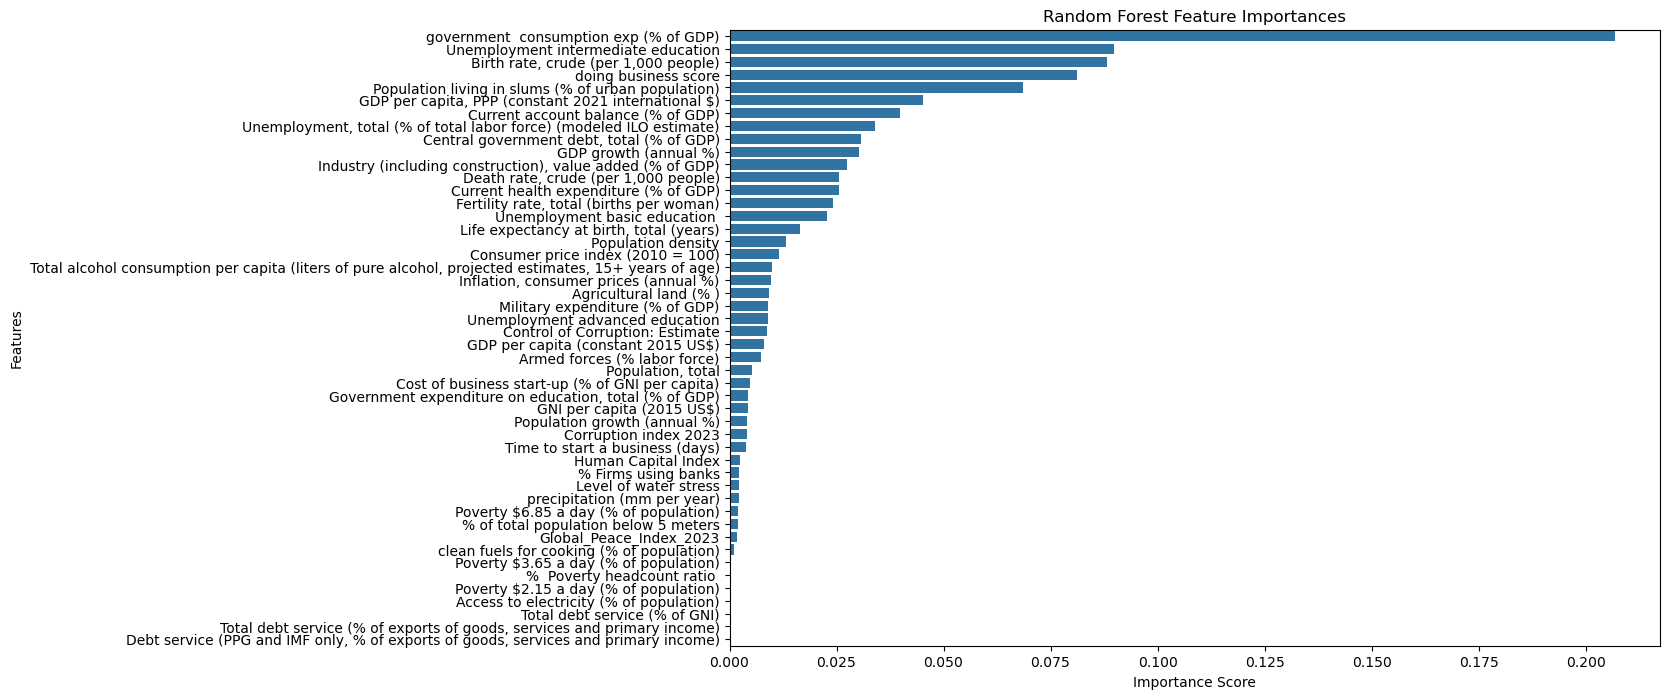

In [76]:
# Plot feature importances
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### Actual vs Predicted Values

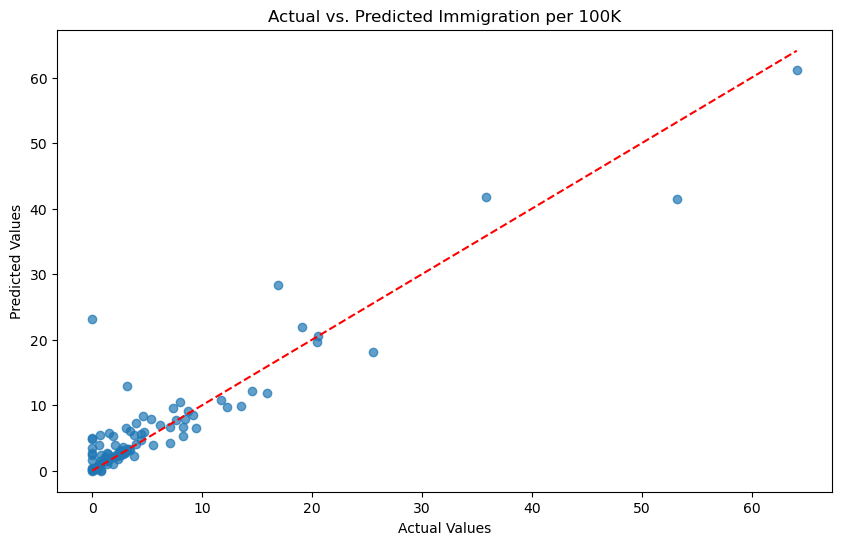

In [77]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.title('Actual vs. Predicted Immigration per 100K')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

### Using GridSearchCV to tune the RandomForestRegressor

In [78]:
### Using GridSearchCV to tune the RandomForestRegressor
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV to perform 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the grid search on the training data (assume X_train, y_train are defined)
grid_search.fit(X_train, y_train)

# Output the best parameters found
print("Best parameters found:", grid_search.best_params_)

# Use the best estimator to predict on the test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Evaluate the performance of the tuned model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print("Tuned Random Forest Regression MSE:", mse_best)
print("Tuned Random Forest Regression R2:", r2_best)

Best parameters found: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Tuned Random Forest Regression MSE: 11.2006022168326
Tuned Random Forest Regression R2: 0.8798074049990361


Random Forest Regression MSE: 13.004449393592177 <br>
Random Forest Regression R2: 0.8604504928471102

In [79]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV to perform 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the grid search on the training data (assume X_train, y_train are defined)
grid_search.fit(X_train, y_train)

# Output the best parameters found
print("Best parameters found:", grid_search.best_params_)

# Use the best estimator to predict on the test set
best_rf2 = grid_search.best_estimator_
y_pred_best2 = best_rf2.predict(X_test)

# Evaluate the performance of the tuned model
mse_best2 = mean_squared_error(y_test, y_pred_best2)
r2_best2 = r2_score(y_test, y_pred_best2)
print("Tuned Random Forest Regression MSE:", mse_best2)
print("Tuned Random Forest Regression R2:", r2_best2)

Best parameters found: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Tuned Random Forest Regression MSE: 10.20147982855921
Tuned Random Forest Regression R2: 0.890528892133868


## Using Feature selection

In [80]:
## Using Feature selection
top_features = feature_importances.index[:5]
X_new5 = X[top_features]
X_new5.head()

,government consumption exp (% of GDP),Unemployment intermediate education,"Birth rate, crude (per 1,000 people)",doing business score,Population living in slums (% of urban population)
75,19.188876,6.150,12.9,80.38389,0.0
76,19.973593,5.910,12.9,80.22369,0.0
77,19.948283,5.470,12.6,80.76007,0.0
78,20.016829,5.586,12.6,80.70552,0.0
79,20.371341,5.367,12.1,81.21506,0.0


In [81]:
X_new5.shape

(501, 5)

## Splitting the data

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_new5, y, test_size=0.2, random_state=42)

In [83]:
X_train.shape

(400, 5)

In [84]:
X_test.shape

(101, 5)

## Regression Modelling

### --- Linear Regression ---

In [85]:
# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)

Linear Regression MSE: 94.98896520158672
Linear Regression R2: -0.01931753338023201


In [86]:
# --- Random Forest Regression ---
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression MSE:", mse_rf)
print("Random Forest Regression R2:", r2_rf)

Random Forest Regression MSE: 12.576924545041688
Random Forest Regression R2: 0.8650382212549144


## Feature Importance & Key Variable Analysis

In [87]:
# Use Random Forest to gauge feature importance
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X_new5.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
 government  consumption exp (% of GDP)                0.296166
Unemployment intermediate education                   0.254266
doing business score                                  0.192587
Birth rate, crude (per 1,000 people)                  0.177679
Population living in slums (% of urban population)    0.079301
dtype: float64


### Actual vs Predicted Values

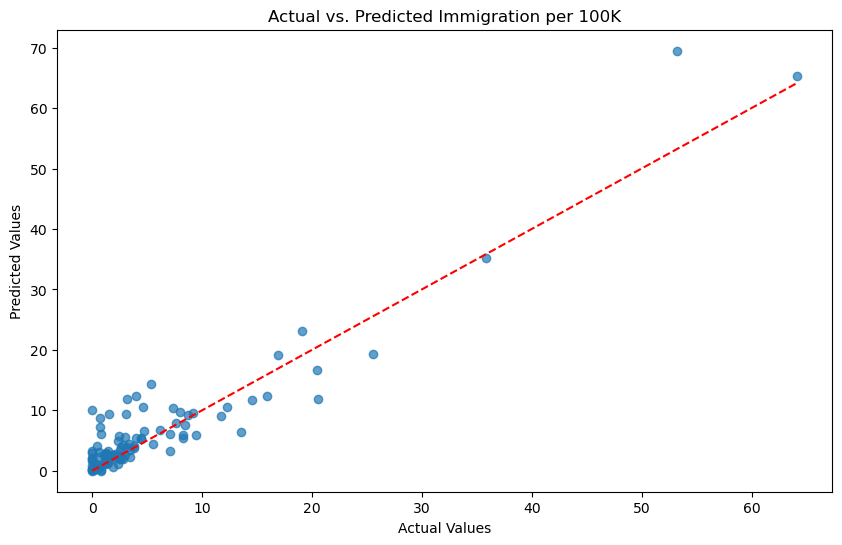

In [88]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.title('Actual vs. Predicted Immigration per 100K')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

### Using GridSearchCV to tune the RandomForestRegressor

In [89]:
### Using GridSearchCV to tune the RandomForestRegressor
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV to perform 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the grid search on the training data (assume X_train, y_train are defined)
grid_search.fit(X_train, y_train)

# Output the best parameters found
print("Best parameters found:", grid_search.best_params_)

# Use the best estimator to predict on the test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Evaluate the performance of the tuned model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print("Tuned Random Forest Regression MSE:", mse_best)
print("Tuned Random Forest Regression R2:", r2_best)

c:\Users\Owner\anaconda3\envs\dev\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Regression MSE: 12.802498289342608
Tuned Random Forest Regression R2: 0.8626176109014043


In [90]:
countries_cluster  = df_cluster_0['country-year'].str.split(' - ').str[0]
countries_cluster = countries_cluster.unique()
countries_cluster

array(['Australia', 'Austria', 'Bahamas, The', 'Bahrain', 'Barbados',
       'Belgium', 'Bermuda', 'Brunei Darussalam', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong SAR, China', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Korea, Rep.', 'Kuwait', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao SAR, China',
       'Malaysia', 'Malta', 'Marshall Islands', 'Netherlands',
       'New Zealand', 'Norway', 'Oman', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Russian Federation', 'San Marino', 'Saudi Arabia',
       'Seychelles', 'Singapore', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Trinidad and Tobago',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay'], dtype=object)

## Steps to Save and Deploy the Model


In [91]:
# Save the fitted StandardScaler (assume 'scaler' was fitted on your training data)

# Save the best RandomForestRegressor model obtained from GridSearchCV
joblib.dump(best_rf, '../best_rf_model_cluster0.pkl')

['../best_rf_model_cluster0.pkl']

## Deploying for Future Forecasts

In [92]:
# Load the  model (or the pipeline if you created one)

best_rf = joblib.load('../best_rf_model_cluster0.pkl')

# For new data (assume new_data is a DataFrame or array with the same feature columns):
# If using separate scaler and model
# Top Features = [ 'government consumption exp (% of GDP)',	'Unemployment intermediate education',	
#                   'Birth rate, crude (per 1,000 people)',	'doing business score',	
#                   'Population living in slums (% of urban population)'
#                ]
# Your new_data as a list of feature values for a single sample
new_data = [25, 5, 12, 62, 0]

# Convert the list to a NumPy array and reshape it to a 2D array
new_data_array = np.array(new_data).reshape(1, -1)


# Use the best model to predict using the scaled new data
predictions = best_rf.predict(new_data_array)
print("Predictions:", predictions)


Predictions: [0.10736259]


c:\Users\Owner\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
